In [56]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib


np.random.seed(42)
num_iter = 5000
d = 100 # dimensions of data
n = 1000 # number of data points
hf_train_sz = int(0.8 * n//2)
X_pos = np.random.normal(size=(n//2, d))
X_pos = X_pos + .12
X_neg = np.random.normal(size=(n//2, d))
X_neg = X_neg - .12
X_train = np.concatenate([X_pos[:hf_train_sz], X_neg[:hf_train_sz]])
X_test = np.concatenate([X_pos[hf_train_sz:], X_neg[hf_train_sz:]])
y_train = np.concatenate([np.ones(hf_train_sz), -1 * np.ones(hf_train_sz)])
y_test = np.concatenate([np.ones(n//2 - hf_train_sz), -1 * np.ones(n//2 - hf_train_sz)])


In [57]:
# defining logistic and logistic gradient

def logistic(w, X, y):
    return np.mean(np.log(1 + np.exp(-y * X.dot(w))))

# stolchastic gradient of logistic loss
def grad_logistic(w, X, y):
    sgd_index = np.random.randint(0, X.shape[0])
    return -y[sgd_index] * X[sgd_index] / (1 + np.exp(y[sgd_index] * X[sgd_index].dot(w)))


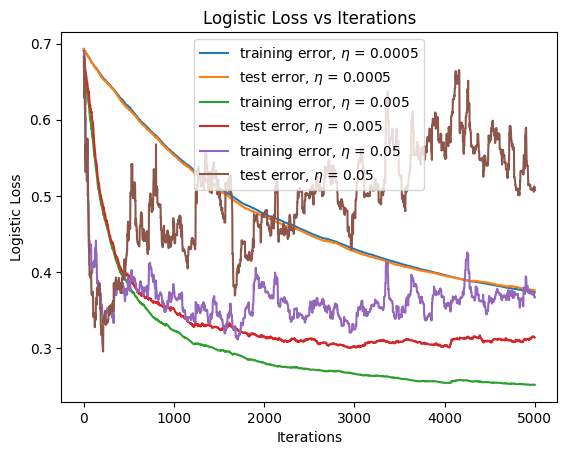

In [58]:
# Question 4.1: SDG on logistic loss

eta_choices = np.array([0.0005,0.005,0.05])


training_error_all = np.zeros((eta_choices.shape[0], num_iter))
test_error_all = np.zeros((eta_choices.shape[0], num_iter))

for index, eta in enumerate(eta_choices):
    w = np.zeros(d)
    for iter in range(num_iter):
        w = w - eta * grad_logistic(w, X_train, y_train)
        training_error_all[index, iter] = logistic(w, X_train, y_train)
        test_error_all[index, iter] = logistic(w, X_test, y_test)



plt.figure()
for index, eta in enumerate(eta_choices):
    # plot using only even indices to reduce number of points plotted
    plt.plot(np.arange(0, num_iter, 2), training_error_all[index, ::2], label=r'training error, $\eta$ = {}'.format(eta))
    plt.plot(np.arange(0, num_iter, 2), test_error_all[index, ::2], label=r'test error, $\eta$ = {}'.format(eta))
    #plt.plot(training_error_all[index], linestyle='dotted',label='training error, eta = {}'.format(eta))
    #plt.plot(test_error_all[index], label='test error, eta = {}'.format(eta))
    plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Logistic Loss')
plt.title('Logistic Loss vs Iterations')
tikzplotlib.save("Q4.1.tex")

In [59]:
# defining 0-1 and 0-1 gradiant

def zero_one(w,X,y):
    return np.mean(np.sign(X.dot(w)) != y)



Average of final 300 iterations of test error for 0-1 loss with eta = 0.0005: 0.11056666666666667
Average of final 300 iterations of test error for 0-1 loss with eta = 0.005: 0.13283333333333336
Average of final 300 iterations of test error for 0-1 loss with eta = 0.05: 0.151


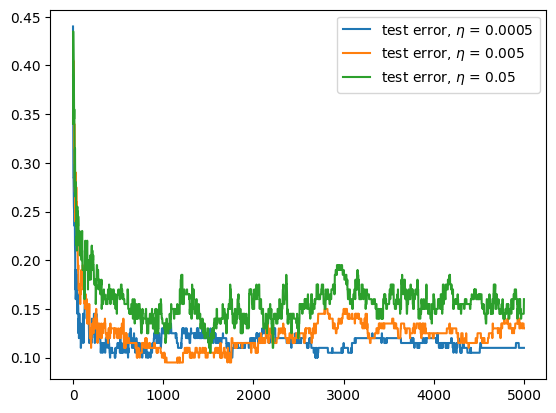

In [66]:
# Question 4.2: logistic SGD and 0-1 loss

eta_choices = np.array([0.0005,0.005,0.05])


training_error_all = np.zeros((eta_choices.shape[0], num_iter))
test_error_all = np.zeros((eta_choices.shape[0], num_iter))

for index, eta in enumerate(eta_choices):
    w = np.zeros(d)
    for iter in range(num_iter):
        w = w - eta * grad_logistic(w, X_train, y_train)
        training_error_all[index, iter] = zero_one(w, X_train, y_train)
        test_error_all[index, iter] = zero_one(w, X_test, y_test)


for index, eta in enumerate(eta_choices):
    # plot using only even indices to reduce number of points plotted
    # plt.plot(np.arange(0, num_iter, 2), training_error_all[index, ::2], label=r'training error, $\eta$ = {}'.format(eta))
    plt.plot(np.arange(0, num_iter, 2), test_error_all[index, ::2], label=r'test error, $\eta$ = {}'.format(eta))
    plt.legend()
tikzplotlib.save("Q4.2.tex")

print("Average of final 300 iterations of test error for 0-1 loss with eta = 0.0005: {}".format(np.mean(test_error_all[0, -300:])))
print("Average of final 300 iterations of test error for 0-1 loss with eta = 0.005: {}".format(np.mean(test_error_all[1, -300:])))
print("Average of final 300 iterations of test error for 0-1 loss with eta = 0.05: {}".format(np.mean(test_error_all[2, -300:])))
